# Swan Visualization
The first cell code will read the Swan input file, and get some basic parameters for visualization.
Please execute the below code firstly, then you could generate plots separately. 

In [2]:
import numpy as np
from buoy import Buoytable


opdir = 'output/'

with open(opdir + 'INPUT') as input_file:
        for line in input_file:
            if line.startswith("$"):
                continue
            else:
                data = line.strip().split()
                if line.startswith("POINTS"):
                    buoy_loc_name = "%s" % (data[3].strip('\''))
                elif line.startswith("TABLE"):
                    buoy_table_name = "%s" % (data[3].strip('\''))
                else:
                    continue

input_file.close()

loc_list=[]
with open(opdir + buoy_loc_name) as point_file:
    for line in point_file:
            data = line.strip().split()
            fname_k = "%s,%s" % (data[0],data[1])
            loc_list.append(fname_k)
point_file.close()

locCount = len(loc_list)


with open(opdir+buoy_table_name) as buoyTable:
    lines = buoyTable.readlines()
    
    # [1:] delete first element '%' 
    outputVars = lines[4].split()[1:]
    varsDict = dict(zip(outputVars, range(len(outputVars))))
    
    varsUnit = lines[5].split()[1:]
    unitDict = dict(zip(varsUnit, range(len(varsUnit))))
    
    buoyValue = []
    for line in lines[7:]:
        buoyValue.append(line.split())



## Time Series 1D
Here you could generate time series 1D plot with output variables, including X-Windv, Y-Windv, Hsig, Dir, PkDir ...    on specific location. 
Just change the the output_var and the location index locIndex.

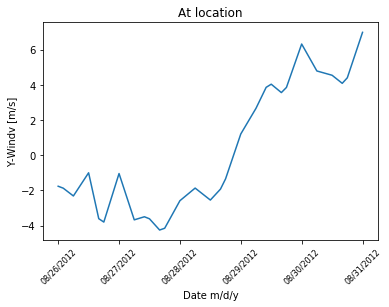

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates

import time
import datetime

outputVar = "Y-Windv"
locIndex = 9

varIndex = varsDict.get(outputVar)
unit = varsUnit[varIndex]

def singlePlot():
    plt.clf()
    plt.cla()
    plt.close()
    
    fig, ax = plt.subplots()
    
    X = []
    Y = []
    
    #try: 
    for line in range(locIndex - 1, len(buoyValue), locCount):
        # X is Time
        t = buoyValue[line][0]
        ymd = t[0:8]
        hms = t[9:15]
        dt = time.mktime(datetime.datetime.strptime(ymd + hms, '%Y%m%d%H%M%S').timetuple())
        X.append(int(dt))
        
        # Y is outputVar
        Y.append(buoyValue[line][int(varIndex)])
    
    dts = list(map(datetime.datetime.fromtimestamp, X))
    X = dates.date2num(dts)
    
    ax.plot(X,Y)
    ax.set_title("At location")
    ax.set_ylabel(outputVar+" "+unit)
    plt.xlabel("Date m/d/y")
    ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.xticks(rotation=45,fontsize=8)
    
    plt.show()    
    
    #except Exception as ex_results:
        #print ("Error: ", ex_results)
        #plt.close()

singlePlot()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


output_var = "PkDir"


def oneDPlots(Y_axis):
    plt.clf()
    plt.cla()
    plt.close()
    
    
    fig_size = []
    fig_size.append(15)
    fig_size.append(8)
    plt.rcParams["figure.figsize"] = fig_size
    
    Buoytable1 = Buoytable(opdir+buoy_table_name)
    
    for igauge in range(1,11):
        axs=plt.subplot(5,2,int(igauge)) # the first subplot in the first figure
        if (Y_axis=='Hsig'):
            pts = axs.plot(Buoytable1.get_Time(igauge-1), Buoytable1.get_Hsig(igauge-1))
        if (Y_axis=='PkDir'):
            pts = axs.plot(Buoytable1.get_Time(igauge-1), Buoytable1.get_PkDir(igauge-1))
        if (Y_axis=='RTpeak'):
            pts = axs.plot(Buoytable1.get_Time(igauge-1), Buoytable1.get_RTpeak(igauge-1))
        if (Y_axis=='X_Windv'):
            pts = axs.plot(Buoytable1.get_Time(igauge-1), Buoytable1.get_X_Windv(igauge-1))
        if (Y_axis=='Y_Windv'):
            pts = axs.plot(Buoytable1.get_Time(igauge-1), Buoytable1.get_Y_Windv(igauge-1))
            
        if (int(igauge)<=8):
            plt.xticks([])
        if (int(igauge)>=9):
            plt.xlabel("Date m/d/y")
            axs.xaxis.set_major_locator(dates.DayLocator(interval=1))
            axs.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
            plt.xticks(rotation=45,fontsize=8)
        if (int(igauge)==1 or int(igauge)==3 or int(igauge)==5 or int(igauge)==7 or int(igauge)==9):
            if (Y_axis=='Hsig'):
                plt.ylabel(Y_axis+' (m)')
            if (Y_axis=='PkDir'):
                plt.ylabel(Y_axis+' (degr)')
            if (Y_axis=='RTpeak'):
                plt.ylabel(Y_axis+' (sec)')
            if (Y_axis=='X_Windv'):
                plt.ylabel(Y_axis+' (m/s)')
            if (Y_axis=='Y_Windv'):
                plt.ylabel(Y_axis+' (m/s)')
        plt.title('buoy %s' %(igauge),fontsize=8)
        plt.setp(pts, 'color', 'b', 'linewidth', 2.0)
    
    plt.show()
    
oneDPlots(output_var)